# Import & Clean Up Data


In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
import zipfile
import kaggle


In [2]:
# download dataset from kaggle using the Kaggle API
!kaggle datasets download -d hmavrodiev/london-bike-sharing-dataset

Dataset URL: https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset


  0%|          | 0.00/165k [00:00<?, ?B/s]
100%|██████████| 165k/165k [00:00<00:00, 326kB/s]
100%|██████████| 165k/165k [00:00<00:00, 321kB/s]



License(s): other



In [3]:
# extract the file from the downloaded zip file

zipfile_name = 'london-bike-sharing-dataset.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [4]:
# read in the csv file as a pandas dataframe
bikes = pd.read_csv("london_merged.csv")

# Metadata:

- "timestamp" - timestamp field for grouping the data
- "cnt" - the count of a new bike shares
- "t1" - real temperature in C
- "t2" - temperature in C "feels like"
- "hum" - humidity in percentage
- "windspeed" - wind speed in km/h
- "weathercode" - category of the weather
- "isholiday" - boolean field - 1 holiday / 0 non holiday
- "isweekend" - boolean field - 1 if the day is weekend
- "season" - category field meteorological seasons: 
    - -- 0-spring ; 1-summer; 2-fall; 3-winter.
- "weather_code" category description:

    - -- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
    - -- 2 = scattered clouds / few clouds 
    - -- 3 = Broken clouds 
    - -- 4 = Cloudy 
    - -- 7 = Rain/ light Rain shower
    - -- 10 = rain with thunderstorm 
    - -- 26 = snowfall 
    - -- 94 = Freezing Fog

In [5]:
# explore the data type
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [6]:
# make sure there's no null value, or more data process to remove/replace null will be done
bikes.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [7]:
bikes.drop(['season', 'weather_code', 'is_holiday','is_weekend'], axis=1).describe()
# axis=1 is column; axis=0 is row

,cnt,t1,t2,hum,wind_speed
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063
std,1085.108068,5.571818,6.615145,14.313186,7.894570
min,0.000000,-1.500000,-6.000000,20.500000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000
max,7860.000000,34.000000,34.000000,100.000000,56.500000


In [8]:
# t1-t2 corr

bikes['t1'].corr(bikes['t2'])

np.float64(0.9883442218765804)

- from notes above, we can detect that weather_code and season columns are numerical value but can be specified as categorical variables
- the is_holiday and is_weekend columns are  boolean variables
- besides timestamp which obviously a date-time object, we can make numerical analysis on the rest of the columns

- update from latest output above:
    - cnt: count of bike share, probably gonna be main variable
    - t1 & t2 are almost the same: high correlation
    - outliers can be detected from temp, humidity, windspeed

# Data Cleaning

    - drop t2 column,
    - change the column name
    - create season and weather dict, to map the integers value to actual and meaningful value

In [ ]:
bikes.drop(['t2'], axis=1, inplace=True)

In [10]:
# specifying the column names that I want to use
new_cols_dict = {
    'timestamp' : 'time',
    'cnt' : 'count',
    't1' : 'temp_c',
    'hum' : 'humidity',
    'wind_speed' : 'windspeed_kph',
    'weather_code' : 'weather',
    'is_holiday' : 'is_holiday',
    'is_weekend':'is_weekend',
    'season':'season'
}

# Renaming the columns to the specified column names
bikes.rename(new_cols_dict, axis=1, inplace=True)

In [11]:
# creating a season dictionary so that we can map the integers 0-3 to the actual written values
season_dict = {
    '0.0':'spring',
    '1.0':'summer',
    '2.0':'autumn',
    '3.0':'winter'
}

# creating a weather dictionary so that we can map the integers to the actual written values
weather_dict = {
    '1.0':'Clear',
    '2.0':'Scattered clouds',
    '3.0':'Broken clouds',
    '4.0':'Cloudy',
    '7.0':'Rain',
    '10.0':'Rain with thunderstorm',
    '26.0':'Snowfall'
}

# changing the seasons column data type to string
bikes.season = bikes.season.astype('str')

# changing the weather column data type to string
bikes.weather = bikes.weather.astype('str')

# mapping the values 0-3 to the actual written seasons
bikes.season = bikes.season.map(season_dict)

# mapping the values to the actual written weathers
bikes.weather = bikes.weather.map(weather_dict)

In [13]:
bikes.head()

,time,count,temp_c,humidity,windspeed_kph,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,93.0,6.0,Broken clouds,0.0,1.0,winter
1,2015-01-04 01:00:00,138,3.0,93.0,5.0,Clear,0.0,1.0,winter
2,2015-01-04 02:00:00,134,2.5,96.5,0.0,Clear,0.0,1.0,winter
3,2015-01-04 03:00:00,72,2.0,100.0,0.0,Clear,0.0,1.0,winter
4,2015-01-04 04:00:00,47,2.0,93.0,6.5,Clear,0.0,1.0,winter


# Make change with the timestamp column 
- set to datetime
- copy dataset to make timestamp as index
- make new column for month day year

In [14]:
# convert timestamp column from object datatypt to datetime type
bikes['time'] = pd.to_datetime(bikes['time'])

In [15]:
bike = bikes.set_index('time').copy()

In [16]:
bike['year_month']= bike.index.strftime('%Y-%m')
bike['year'] = bike.index.year
bike['month']= bike.index.strftime('%b')
bike['day_of_week']=bike.index.strftime('%a')
bike['hour']=bike.index.hour

bike.head()

,count,temp_c,humidity,windspeed_kph,weather,is_holiday,is_weekend,season,year_month,year,month,day_of_week,hour
time,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,93.0,6.0,Broken clouds,0.0,1.0,winter,2015-01,2015,Jan,Sun,0
2015-01-04 01:00:00,138,3.0,93.0,5.0,Clear,0.0,1.0,winter,2015-01,2015,Jan,Sun,1
2015-01-04 02:00:00,134,2.5,96.5,0.0,Clear,0.0,1.0,winter,2015-01,2015,Jan,Sun,2
2015-01-04 03:00:00,72,2.0,100.0,0.0,Clear,0.0,1.0,winter,2015-01,2015,Jan,Sun,3
2015-01-04 04:00:00,47,2.0,93.0,6.5,Clear,0.0,1.0,winter,2015-01,2015,Jan,Sun,4


# Total Bike Ride Based on Seasons
-  Creates a pie chart for sum of bike rides for every season

In [17]:
# create a variable, that will sum up the count of bike ride group by season
season_counts = bike.groupby('season')['count'].sum()
season_counts = season_counts.sort_values()

season_counts

season
winter    3558087
spring    4850236
autumn    5073040
summer    6424609
Name: count, dtype: int64

In [18]:
#create var for the sum of count 
sum_of_count = bike['count'].sum()

# change to %
season_counts_perc = 100* (season_counts)/sum_of_count
season_counts_perc

season
winter    17.874470
spring    24.365733
autumn    25.485015
summer    32.274782
Name: count, dtype: float64

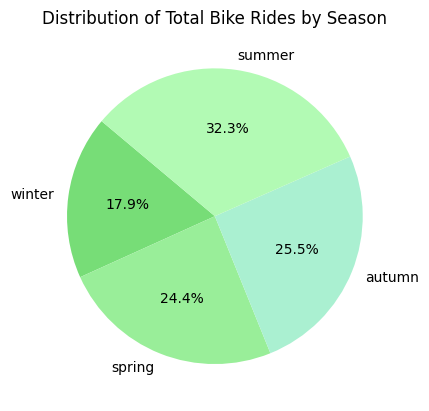

In [23]:
# Plot the pie chart - using matplotlib
plt.pie(season_counts_perc, 
        labels=season_counts_perc.index, 
        autopct='%1.1f%%', # display the percentage value of each slice on the chart.
        startangle=140, # chart will start drawing from an angle of 140 degrees
        colors=['#77dd77', '#99ee99', '#aaf0d1', '#b2fab4'])

# Add a title
plt.title('Distribution of Total Bike Rides by Season')

# Display the pie chart
plt.show()

# Total Bike Ride Based on Weather
-  Creates a stacked horizontal bar chart for the weather condition and sum of bike rides for each weather

In [25]:
# create a variable, that will sum up the count of bike ride group by season and change to %

weather_counts = bike.groupby('weather')['count'].sum()
weather_counts = weather_counts.sort_values()

weather_counts_perc = 100* (weather_counts)/sum_of_count
weather_counts_perc

weather
Rain with thunderstorm     0.041033
Snowfall                   0.075610
Cloudy                     4.671854
Rain                       7.668357
Broken clouds             21.319667
Scattered clouds          30.320449
Clear                     35.903030
Name: count, dtype: float64

In [26]:
# want to use seaborn plot, need to change weather_count_perc var as dataframe

weather_counts_df = weather_counts_perc.reset_index()
weather_counts_df = weather_counts_df.sort_values(by='count', ascending=False)

# Rename columns
weather_counts_df.columns = ['Weather', 'Total Count']
weather_counts_df

,Weather,Total Count
6,Clear,35.903030
5,Scattered clouds,30.320449
4,Broken clouds,21.319667
3,Rain,7.668357
2,Cloudy,4.671854
1,Snowfall,0.075610
0,Rain with thunderstorm,0.041033


C:\Users\fatin\AppData\Local\Temp\ipykernel_18420\1764330197.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Total Count', y='Weather', data=weather_counts_df, palette='pastel')


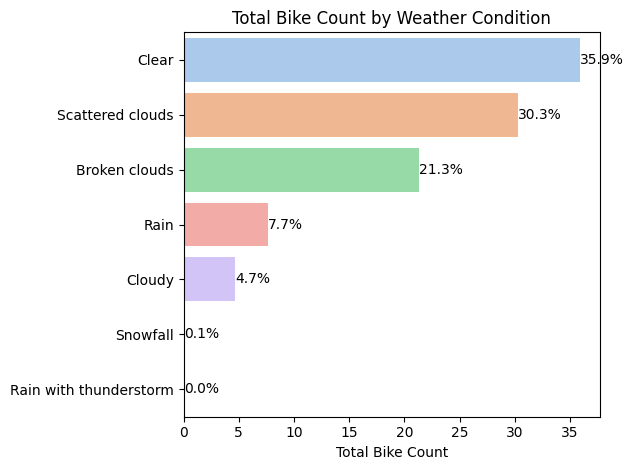

In [27]:
sns.set_style= "whitegrid"

# Create a horizontal bar plot using Seaborn
barplot = sns.barplot(x='Total Count', y='Weather', data= weather_counts_df, palette='pastel')

# Add labels and title
plt.xlabel('Total Bike Count')
plt.ylabel('')
plt.title('Total Bike Count by Weather Condition')

# Annotate each bar with the count
for index, value in enumerate(weather_counts_df['Total Count']):
    plt.text(value, index, f'{value:,.1f}%', va='center')


# Display the plot
plt.tight_layout()
plt.show()

# Correlation  
between temperature ,windspeed and humidity with the count of bike ride share


In [29]:
bike_corr = round(bike[['count','temp_c','humidity','windspeed_kph']].corr(),2)

bike_corr


,count,temp_c,humidity,windspeed_kph
count,1.00,0.39,-0.46,0.12
temp_c,0.39,1.00,-0.45,0.15
humidity,-0.46,-0.45,1.00,-0.29
windspeed_kph,0.12,0.15,-0.29,1.00


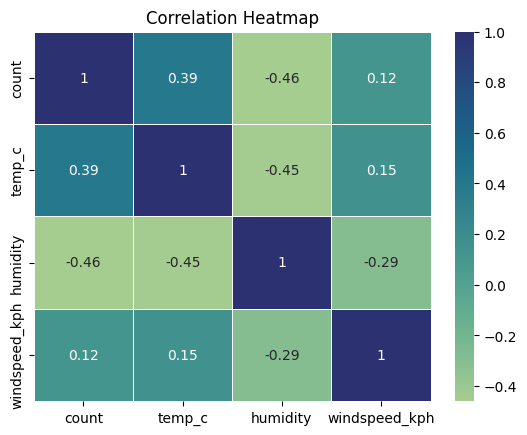

In [35]:
# plot correlation heatmap

sns.heatmap(bike_corr, annot=True, cmap='crest', linecolor='white', linewidth=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [30]:
# sorts the correlation values with respect to 'count' in desc order

corr_with_cnt = bike_corr['count'].sort_values(ascending=False)

corr_with_cnt

count            1.00
temp_c           0.39
windspeed_kph    0.12
humidity        -0.46
Name: count, dtype: float64

C:\Users\fatin\AppData\Local\Temp\ipykernel_18420\2993749756.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=corr_with_cnt.index, y=corr_with_cnt.values, palette='crest')


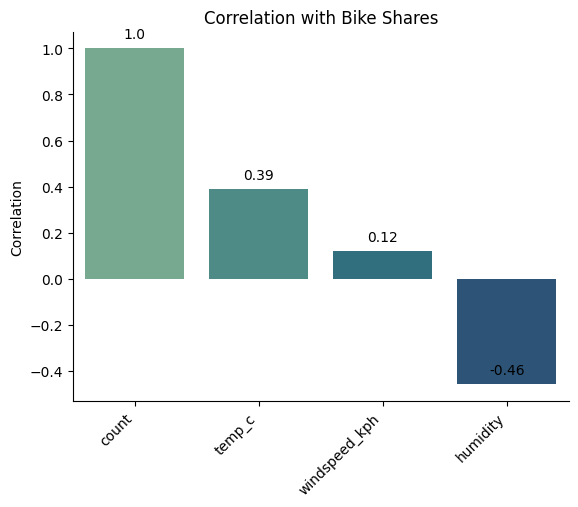

In [48]:
# plot correlation bargraph, sort by count

ax = sns.barplot(x=corr_with_cnt.index, y=corr_with_cnt.values, palette='crest')
sns.despine()
plt.title('Correlation with Bike Shares')
plt.xlabel('')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', # adds a text label 
                (p.get_x() + p.get_width() / 2., p.get_height()), # tuple that defines the position where the annot will be placed
                ha='center', 
                va='center', 
                xytext=(0, 10), # text will be offset by 0 points in the x-d & by 10 points in the y-d
                textcoords='offset points')

plt.show()


# Bike Ride Share over Time

C:\Users\fatin\AppData\Local\Temp\ipykernel_18420\2575678445.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


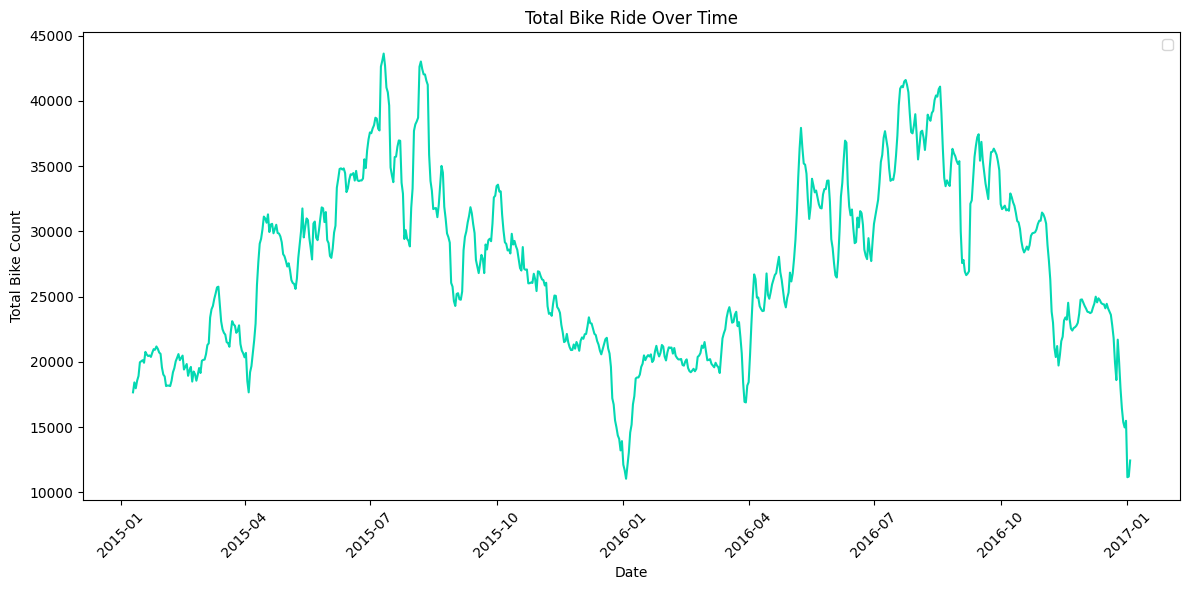

In [59]:
# resampling the count column data:  group the 'count' data based on a new frequency, daily bins (one group per day), hence the 'D'
# as the original data recorded bike share multiple times per day, so we want to calculate sum of bike rides per day

daily_counts = bike['count'].resample('D').sum()

# make the graph line smoother: using a rolling window (e.g., 7-day rolling average)
smoothed_counts = daily_counts.rolling(window=7).mean()

# Plot the smoothed daily bike counts as a smooth line graph without dots
plt.figure(figsize=(12, 6))
plt.plot(smoothed_counts.index, smoothed_counts.values, linestyle='-', color='#04D8B2')


# Add labels and title
plt.xlabel('Date')
plt.ylabel('Total Bike Count')
plt.title('Total Bike Ride Over Time')

# Show the legend and plot
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to prevent label overlap
plt.show()

# Bike Ride Share per Hour
- this to determine the peak time of bike share

In [64]:
# sum up all the count value, group by hour
hour_counts = bike.groupby('hour')['count'].sum()

# make it as dataframe
hour_counts_df = hour_counts.reset_index()

hour_counts

hour
0      210401
1      145257
2       98275
3       67951
4       52859
5       79820
6      338771
7     1066309
8     2087164
9     1201745
10     771879
11     836936
12    1045180
13    1096178
14    1071619
15    1140609
16    1364955
17    2059938
18    1913944
19    1200648
20     770461
21     538147
22     429497
23     317429
Name: count, dtype: int64

C:\Users\fatin\AppData\Local\Temp\ipykernel_18420\1657729101.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='hour', data=hour_counts_df, orient='h', palette='pastel')


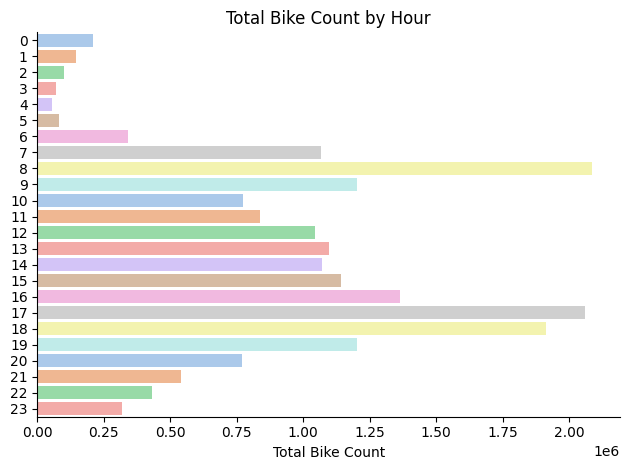

In [70]:
sns.set_style= "whitegrid"
# Create a horizontal bar plot using Seaborn

sns.barplot(x='count', y='hour', data=hour_counts_df, orient='h', palette='pastel')
sns.despine()

# Add labels and title
plt.xlabel('Total Bike Count')
plt.ylabel('')
plt.title('Total Bike Count by Hour')


# Display the plot
plt.tight_layout()
plt.show()